In [103]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [104]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [105]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(units=10, activation=tf.nn.softmax))

In [106]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])

In [107]:
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2590 - accuracy: 0.9235
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1055 - accuracy: 0.9670
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0720 - accuracy: 0.9770
Epoch 4/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0519 - accuracy: 0.9836
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0395 - accuracy: 0.9870
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0311 - accuracy: 0.9902
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0254 - accuracy: 0.9917
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0212 - accuracy: 0.9928
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0174 - accuracy: 0.9942
Epoch 10/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.016

In [108]:
model.save('digits.model')

INFO:tensorflow:Assets written to: digits.model\assets


INFO:tensorflow:Assets written to: digits.model\assets


The result is: 2


<function matplotlib.pyplot.show(close=None, block=None)>

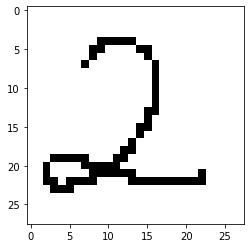

In [130]:
img = cv.imread(f'C:/Machine learning/21.png')[:,:,0]
img = np.invert(np.array([img]))
prediction = model.predict(img)
print (f'The result is: {np.argmax(prediction)}')
plt.imshow(img[0], cmap=plt.cm.binary)
plt.show